# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [356]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [357]:
tsa.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [358]:
tsa.tail(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [359]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [360]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [361]:
tsadesc = []
for i in tsa.columns:
    tsadesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsadesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2010020468303, 2010113078348]"
1,Date Received,object,70,0.14,3522,"[12-Jul-06, 24-Mar-05]"
2,Incident Date,object,570,1.12,10788,"[1/11/2007 0:00, 2/21/2006 0:00]"
3,Airport Code,object,2052,4.02,405,"[ORD, IMT]"
4,Airport Name,object,2052,4.02,419,"[San Luis Obispo, Phoenix Sky Harbor Internati..."
5,Airline Name,object,8555,16.75,243,"[Mountain Air Express Inc, Avianca ]"
6,Claim Type,object,1960,3.84,8,"[Personal Injury, Employee Loss (MPCECA)]"
7,Claim Site,object,190,0.37,6,"[-, Other]"
8,Item,object,1012,1.98,1854,[Clothing; Jewelry & Watches; Jewelry & Watche...
9,Claim Amount,object,992,1.94,13248,"[$2;259.62 , $86.87 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [362]:
tsa['Airport Code'].replace('-', np.nan, inplace=True)
tsa['Airport Name'].replace('-', np.nan, inplace=True)
tsa['Airline Name'].replace('-', np.nan, inplace=True)
tsa['Claim Type'].replace('-', np.nan, inplace=True)
tsa['Claim Site'].replace('-', np.nan, inplace=True)
tsa['Item'].replace('-', np.nan, inplace=True)
tsa['Claim Amount'].replace('-', np.nan, inplace=True)
tsa['Status'].replace('-', np.nan, inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [363]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [364]:
erroridx = []
for i in range(len(tsa)):
    if len(str(tsa['Incident Date'][i])) == 17:
        if str(tsa['Incident Date'][i])[7:10] == '020' or str(tsa['Incident Date'][i])[7:10] == '000':
            erroridx.append(i)

In [365]:
error = tsa.iloc[erroridx , :]

In [366]:
error

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [367]:
def replace_year(cols):
    if str(cols['Incident Date'])[7:10] == '020' or str(cols['Incident Date'])[7:10] == '000':
        return '{}{} {}'.format(str(cols['Incident Date'])[:7],str(cols['Date Received'].year),str(cols['Incident Date'])[12:])
    else:
        return cols['Incident Date']

error['Incident Date'] = error[['Incident Date', 'Date Received']].apply(replace_year, axis = 1)

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [368]:
tsa['Incident Date'][erroridx] = error['Incident Date'].values

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [369]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [370]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [371]:
error = tsa.iloc[erroridx,:]

In [372]:
error

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [373]:
tsa['Day Differences'] = tsa['Date Received'] - tsa['Incident Date']
tsa['Day Differences'] = tsa['Day Differences'].dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [374]:
import seaborn as sns
sns.set_style('darkgrid')

In [375]:
dropnan = tsa.dropna()

Text(0.5, 0, 'Day Differences')

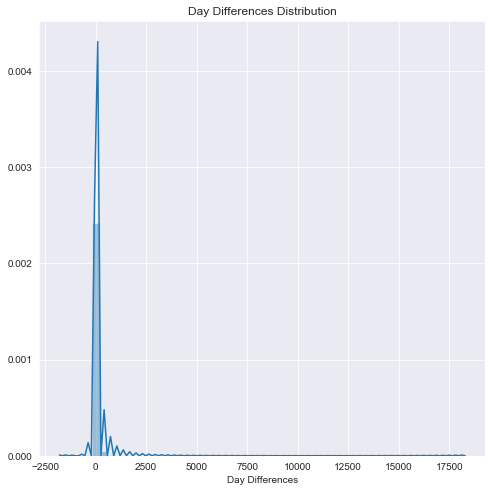

In [376]:
plt.figure(figsize = (8,8))
sns.distplot(dropnan['Day Differences'])
plt.title('Day Differences Distribution')
plt.xlabel('Day Differences')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 0, 'Day Differences')

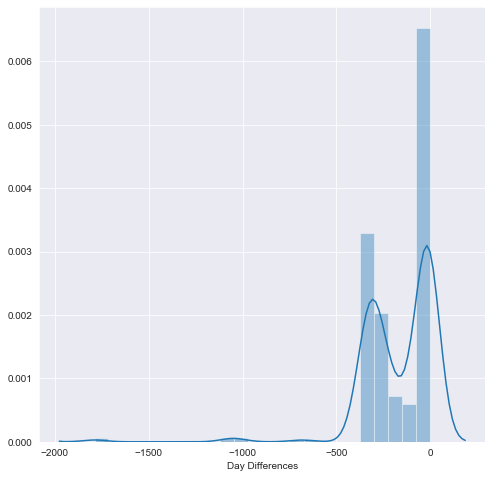

In [377]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'])
plt.xlabel('Day Differences')

Text(0.5, 0, 'Day Differences')

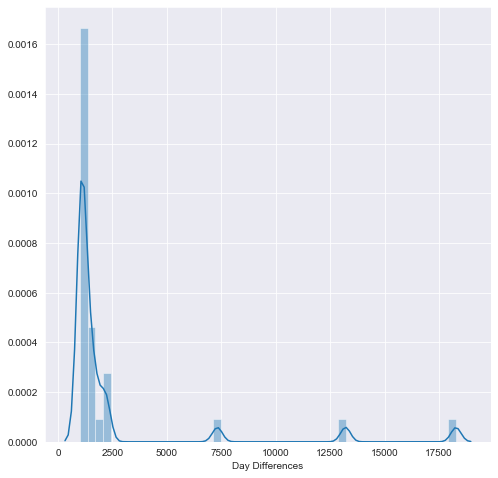

In [378]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'])
plt.xlabel('Day Differences')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [379]:
col = ['Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Claim Amount', 'Status', 'Close Amount', 'Disposition']
for i in col:
    print(i)
    print('Less than 0')
    print(tsa[tsa['Day Differences'] < 0][i].value_counts())
    print('\n')
    print('More than 1000')
    print(tsa[tsa['Day Differences'] > 1000][i].value_counts())
    print('\n')

Airport Name
Less than 0
Newark International Airport            21
Los Angeles International Airport       21
Miami International Airport             19
Chicago O'Hare International Airport    19
Phoenix Sky Harbor International        18
                                        ..
Rapid City Regional                      1
Colorado Springs Municipal               1
Ontario International                    1
Portland International Jetport           1
Joe Foss Field                           1
Name: Airport Name, Length: 116, dtype: int64


More than 1000
Hartsfield-Jackson Atlanta International Airport    3
John F. Kennedy International                       2
Non TSA Airport (motor vehicle)                     2
Seattle-Tacoma International                        2
Norman Y Mineta San Jose International              1
Colorado Springs Municipal                          1
Middle Georgia Regional Airport                     1
Washington Dulles International                     1
Erie In

It seems that Status and Disposition did not really affecting before 0 days difference and after 1000 days difference. For Claim Amount, before 0 days difference numbers are lower compared to after 1000 days difference numbers, might indicate items after 1000 days difference are more expensive and valuable. It seems that Item(s) that was damaged or lost was varied. Most Claim Site for both before 0 days difference and after 1000 days difference is at Checked Baggage site. Most Claim Type for both before 0 days difference and after 1000 days difference is Passenger Property Loss and followed by Property Damage. For Airlines, UAL and Delta Airlines appear for both before 0 days difference and after 1000 days difference. For Airport Name, interestingly most cases of before 0 days difference happened in big cities such as LA, Chicago, Miami, Phoenix and most cases of after 1000 days difference happened in smaller towns.

Thus, I would assume that before 0 days difference is caused by the officers that report damages or loss first before the passengers report it to the TSA. I would assume that the officers cause the damages or loss when loading before the flight even takeoff which usually happens in big city Airports. I also would also assume that after 1000 days difference can be caused by the location of Airport that most are located in small towns, I assume that the location of the Airport is a far from living place so people report the incident when they have time to go the Airport.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [380]:
tsa['Close Amount'] = tsa['Close Amount'].replace({'\$':''}, regex = True)
tsa['Close Amount'] = tsa['Close Amount'].replace({';':''}, regex = True)
tsa['Close Amount'] = tsa['Close Amount'].apply(lambda x: float(x))
tsa['Claim Amount'] = tsa['Claim Amount'].replace({'\$':''}, regex = True)
tsa['Claim Amount'] = tsa['Claim Amount'].replace({';':''}, regex = True)
tsa['Claim Amount'] = tsa['Claim Amount'].apply(lambda x: float(x))

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [384]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [385]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [386]:
tsa.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [388]:
dropnan = tsa.dropna()

Text(0.5, 0, 'Amount Differences')

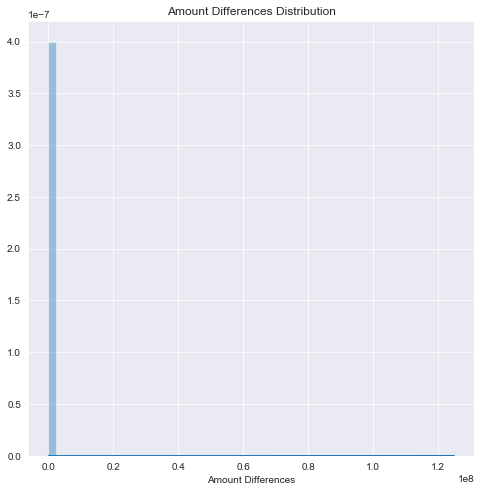

In [389]:
plt.figure(figsize = (8,8))
sns.distplot(dropnan['Amount Differences'])
plt.title('Amount Differences Distribution')
plt.xlabel('Amount Differences')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [392]:
Q1_ad = tsa['Amount Differences'].describe()['25%']
Q3_ad = tsa['Amount Differences'].describe()['75%']
IQR = Q3_ad - Q1_ad

In [403]:
# Q1 equal to zero
out_ad = tsa[(tsa['Amount Differences'] > Q3_ad + (1.5 * IQR))]
ad = tsa[(tsa['Amount Differences'] <= Q3_ad + (1.5 * IQR))]

In [615]:
out_ad.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00


In [401]:
out_ad['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [402]:
out_ad['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

Text(0.5, 1.0, 'Close Amount Outlier data')

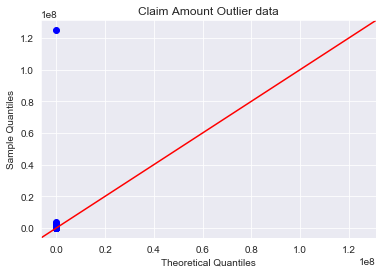

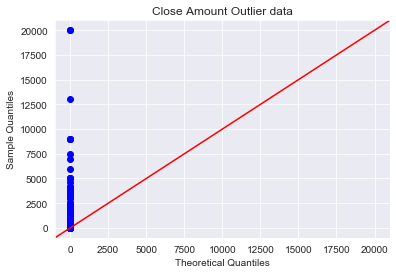

In [433]:
import statsmodels.api as sm
import pylab

sm.qqplot(out_ad['Claim Amount'], line = '45')
plt.title('Claim Amount Outlier data')

sm.qqplot(out_ad['Close Amount'], line = '45')
plt.title('Close Amount Outlier data')

In [434]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [435]:
try_normal(out_ad['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.8322253694841},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [436]:
try_normal(out_ad['Close Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1244.9229604344491},
 'Shapiro': 0.0,
 'K^2': 0.0}

Both Claim dan Close Amount in outlier data are not normally distributed.

Text(0.5, 1.0, 'Close Amount Outlier data')

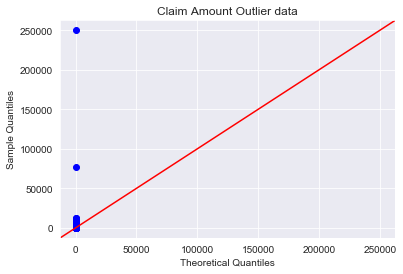

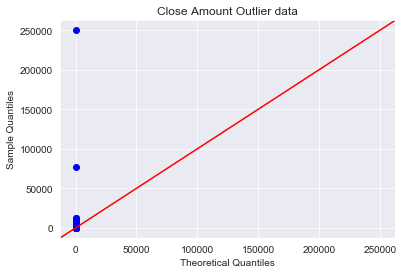

In [447]:
sm.qqplot(ad['Claim Amount'], line = '45')
plt.title('Claim Amount Outlier data')

sm.qqplot(ad['Close Amount'], line = '45')
plt.title('Close Amount Outlier data')

In [441]:
try_normal(ad['Claim Amount'])

C:\Users\Nicholas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 8141.234927112389},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [442]:
try_normal(ad['Close Amount'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 9617.577509332841},
 'Shapiro': 0.0,
 'K^2': 0.0}

Both Claim dan Close Amount in not outlier data are not normally distributed.

In [456]:
out_ad['Claim Amount'].median()

1821.75

In [458]:
out_ad['Close Amount'].median()

0.0

In [459]:
ad['Claim Amount'].median()

139.99

In [460]:
ad['Close Amount'].median()

10.0

I look at the median of Claim Amount and Close Amount in the outlier data and the non-outlier data (because both are not normally distributed for both data), The difference between median is much bigger for outlier data compared to not-outlier data so I agree with your assumption that not outlier is have normal amount differences and outlier have a really big amount differences. I'll try to use statistic to see and check whether the assumption is correct statistically.

In [437]:
from scipy.stats import levene, bartlett, kruskal

In [461]:
levene(out_ad['Claim Amount'], out_ad['Close Amount'])

LeveneResult(statistic=1.7423510662913355, pvalue=0.18687803519500246)

Equal Variance

In [462]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(out_ad['Claim Amount'], out_ad['Close Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 261430.5
P-Value: 0.0


U-Statistic is very big, There must be a big difference between Claim Amount and Close Amount

In [463]:
levene(ad['Claim Amount'], ad['Close Amount'])

LeveneResult(statistic=44.04776745683587, pvalue=3.2323535819784387e-11)

Not Equal Variance

In [464]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(ad['Claim Amount'], ad['Close Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 174045689.0
P-Value: 0.0


U-Statistic is very big and much bigger than outlier, The not-outlier difference must be bigger than outlier difference. 

It seems that according to the statistic, the difference in not-outlier data is much bigger than outlier data. So our assumption is proven incorrect. This must be caused by the bigger diffence of skewness between Claim and Close Amount in not-outlier data compared to outlier data.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

In [567]:
tsa['Airport Name'].value_counts()

John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
                                        ... 
Charles Shulz-Sonoma County                1
Houghton County Memorial                   1
Mercer County; Bluefield                   1
Dodge City Regional                        1
Sloulin Field International                1
Name: Airport Name, Length: 418, dtype: int64

In [568]:
tsa[tsa['Airport Name'] == 'John F. Kennedy International']['Claim Type'].value_counts()

Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64

In [569]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

I don't really see the connection or relationship between Airport and Claim Type because the type of claim that dominates one airport is similar to the type of claim that dominates the whole data.

In [513]:
tsa[['Airport Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airport Name,Claim Type
Airport Name,1.000000,0.042477
Claim Type,0.042477,1.000000


In [514]:
tsa[['Airport Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Airport Name,Claim Type
Airport Name,1.000000,0.059168
Claim Type,0.059168,1.000000


Using factorize, it seems that there is no correlation between Airport Name and Claim Type.

In [579]:
tsa['Airline Name'].value_counts()

American Airlines             4377
Delta Air Lines               4371
UAL                           3507
Southwest Airlines            3258
Continental Airlines          2363
                              ... 
Aerosvit Airlines                1
Arik Airlines                    1
Royal Air Maroc                  1
Malev Hungarian Airlines         1
Liat Airlines                    1
Name: Airline Name, Length: 242, dtype: int64

In [580]:
tsa[tsa['Airline Name'] == 'American Airlines']['Claim Type'].value_counts()

Passenger Property Loss    2646
Property Damage            1507
Personal Injury              24
Passenger Theft              17
Employee Loss (MPCECA)       16
Complaint                     1
Name: Claim Type, dtype: int64

I also don't really see the connection or relationship between Airline and Claim Type because the type of claim that dominates one airline is similar to the type of claim that dominates the whole data.

In [522]:
tsa[['Airline Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airline Name,Claim Type
Airline Name,1.00000,0.11976
Claim Type,0.11976,1.00000


In [523]:
tsa[['Airline Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Airline Name,Claim Type
Airline Name,1.000000,0.057824
Claim Type,0.057824,1.000000


Using factorize, it seems that there is no correlation between Airline Name and Claim Type.

In [524]:
claimnan = tsa[tsa['Claim Type'].isna()]

In [535]:
for i in claimnan.columns:
    print(i,'have',claimnan[i].isna().sum(),'NaN')

Claim Number have 0 NaN
Date Received have 35 NaN
Incident Date have 382 NaN
Airport Code have 547 NaN
Airport Name have 547 NaN
Airline Name have 1003 NaN
Claim Type have 2031 NaN
Claim Site have 130 NaN
Item have 154 NaN
Claim Amount have 473 NaN
Status have 52 NaN
Close Amount have 496 NaN
Disposition have 571 NaN
Day Differences have 384 NaN
Amount Differences have 688 NaN


It's hard to single out a single column that make Claim Type column filled with NaN. But I assume that the claimant forgot to fill the Claim Type or there are multiple Claim Type in one claim.

In [537]:
claimnan['Item'].value_counts().head(5)

Other                                         563
Luggage (all types including footlockers)     268
Clothing - Shoes; belts; accessories; etc.    257
Jewelry - Fine                                192
Cameras - Digital                             145
Name: Item, dtype: int64

Other type of Item tops the type of Item with NaN claim type. The top 4 Item is filled with multiple items grouped into one. So I assume that some of the items must be lost and some of others damaged so there are multiple Claim Type in one Claim.

There is no relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type. NaN in Claim Type can be caused by multiple types of claim in one claim ticket.

### Question

2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [560]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [561]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

It seems that disposition is TSA's own guess or hypothesis whether the claim will be Denied, Approved in Full or Settled. The classes of Status prove this because words such as Deny, Approve or Settle is in the classes of status.

In [555]:
tsa[tsa['Status'] == 'Denied']['Disposition'].value_counts()

Deny    17125
Name: Disposition, dtype: int64

In [556]:
tsa[tsa['Status'] == 'Approved']['Disposition'].value_counts()

Approve in Full    8724
Name: Disposition, dtype: int64

In [558]:
tsa[tsa['Status'] == 'Settled']['Disposition'].value_counts()

Settle    6970
Name: Disposition, dtype: int64

In [565]:
tsa['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

I think it is proven that one disposition by TSA usually result in one Status, Deny will result in Status Denied and etc. 

In [576]:
three_status = tsa[(tsa['Status'] == 'Denied') | (tsa['Status'] == 'Approved') | (tsa['Status'] == 'Settled')]

In [577]:
three_status[['Disposition','Status']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Status
Disposition,1.00000,0.99945
Status,0.99945,1.00000


In [578]:
three_status[['Disposition','Status']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Disposition,Status
Disposition,1.000000,0.998848
Status,0.998848,1.000000


Look how close the correlation is between disposition and status if there are only three certain status to meet with three disposition made by TSA.

In [581]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

Looking at the columns I think there are several impossible columns that will correlate to Status/Disposition ex: claim number, dates, airport code/name, airline name, and claim site

In [582]:
tsa[['Status','Item']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Status,Item
Status,1.000000,0.279619
Item,0.279619,1.000000


In [583]:
tsa[['Status','Item']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Status,Item
Status,1.0000,0.5901
Item,0.5901,1.0000


I see that there are some correlation between Status and Item

In [585]:
tsa[['Disposition','Item']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Item
Disposition,1.000000,-0.388485
Item,-0.388485,1.000000


In [584]:
tsa[['Disposition','Item']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Disposition,Item
Disposition,1.000000,-0.600032
Item,-0.600032,1.000000


I see that it is also similarly correlated but on the negative.

In [586]:
tsa[['Status','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Status,Amount Differences
Status,1.000000,-0.207765
Amount Differences,-0.207765,1.000000


In [587]:
tsa[['Status','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Status,Amount Differences
Status,1.000000,-0.166247
Amount Differences,-0.166247,1.000000


It seems that there is no correlation between Status and Amount Differences.

In [588]:
tsa[['Disposition','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Amount Differences
Disposition,1.000000,0.830399
Amount Differences,0.830399,1.000000


In [589]:
tsa[['Disposition','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Disposition,Amount Differences
Disposition,1.000000,0.423439
Amount Differences,0.423439,1.000000


Interestingly, Disposition and Amount Differences somehow have a correlation. It maybe that absurd Amount Differences might influence the Disposition.

I found out that Disposition affected the Status of Claim and Disposition itself is affected by Amount Differences. I guess making an acceptable Claim Amount can increase your chance of getting your claim Approved or Settled.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [614]:
tsa.groupby('Airline Name').mean()['Amount Differences'].sort_values(ascending=False).head(10)

Airline Name
Sun Country Airlines Inc    2.551300e+06
Westjet Airlines Ltd        1.053564e+05
Swiss Air                   6.772754e+04
Champion Airlines           5.007417e+04
Canadian Airlines           4.559650e+04
Aerolineas Argentinas       6.279833e+03
Air China                   5.823613e+03
Allegiant Air               5.012368e+03
Mountain West               4.132500e+03
TAM airlines                2.827358e+03
Name: Amount Differences, dtype: float64

I found out that Sun Country Airlines Inc, Westjet Airlines Ltd, Swiss Air, Champion Airlines and Canadian Airlines have the highest Amount Differences of any Airlines respectively. These airlines might endanger your (expensive) belongings.

In [616]:
tsa.groupby('Airport Name').mean()['Amount Differences'].sort_values(ascending=False).head(10)

Airport Name
Phoenix Sky Harbor International           143867.376124
TSA - Non-Specified Airport                117537.713810
Gulfport-Biloxi International               57752.233714
Laughlin/Bullhead International Airport     39381.031429
Long Island McArthur; Islip                 19462.265370
Buffalo Niagara International               17826.253411
Sacramento International Airport            14315.196784
Sioux Gateway                               10045.194000
San Francisco International                  6452.605370
Northwest Arkansas Regional                  4310.513333
Name: Amount Differences, dtype: float64

I also found out that Phoenix Sky Harbor International, Gulfport-Biloxi International and Laughlin/Bullhead International Airport are the top 3 airport that have the highest Amount Differences of any Airports respectively. Beware of your (expensive) belongings if you are going through these airports.

In [621]:
tsa.groupby('Status').max().loc[['Approve in Full','Approved'],'Claim Amount']

Status
Approve in Full     5271.0
Approved           13060.0
Name: Claim Amount, dtype: float64

This number is the maximum of approved refund by TSA to claimant. Beware if the value of your belongings is higher than USD 13060, you might not get the reparations for your belongings.

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

In [590]:
df = ad.dropna()

In [595]:
df = df.sample(1000)

In [596]:
df.to_csv('tsa_claims_dashboard_ujian.csv', index=False)

Export the data to your SQL database, and try to connect the database to the dashboard